# Predicting Insurance Costs
##### Updated: 10/18/23
Data Source: [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)


This is a guided project from DataQuest.io to practice using Linear Regression models. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print('Imports complete!')

Imports complete!


In [2]:
insurance = pd.read_csv('insurance.csv')

#Determine n rows and columns
print('DataFrame shape: \n', insurance.shape, '\n')
#Get descriptive stats on numeric variables
print('Summary stats: \n', insurance.describe(), '\n')
#Preview dataframe
insurance.head()

DataFrame shape: 
 (1338, 7) 

Summary stats: 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Notes:
- The dataset has 1,338 rows (claims) and 7 columns.
- There  are 4 numerical variables (age, bmi, children, and charges) and 3 categorical variables (sex, smoker, region).
- There don't seem to be any missing values coded as NaN. The min and max for the numerical variables also make sense, so there don't  seem to be missing values coded as 0. 
- The outcome variable of interest is charges.


###  Data Exploration

#### 1. Examine correlations

In [3]:
corrs = insurance.corr(numeric_only=True)
corrs

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Notes:
1. Among the numeric variables, charges is most highly correlated with age (r = 0.30) and next with bmi (0.20). 
2.  Among the predictors, bmi and age have a stronger correlation with each other than with other variables, but it is still fairly low (0.11).

### 2. Examine categorical variables

#### 2a. Distribution of cat vars

In [4]:
print('Sex: \n', insurance['sex'].value_counts(normalize=True), '\n')
print('Smoker: \n', insurance['smoker'].value_counts(normalize=True), '\n')
print('Region: \n', insurance['region'].value_counts(normalize=True), '\n')


Sex: 
 male      0.505232
female    0.494768
Name: sex, dtype: float64 

Smoker: 
 no     0.795217
yes    0.204783
Name: smoker, dtype: float64 

Region: 
 southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64 



#### Notes:
- Dataset is evenly distributed between males and females and across each of the four regions. 
- Only 20% of patients are smokers. 

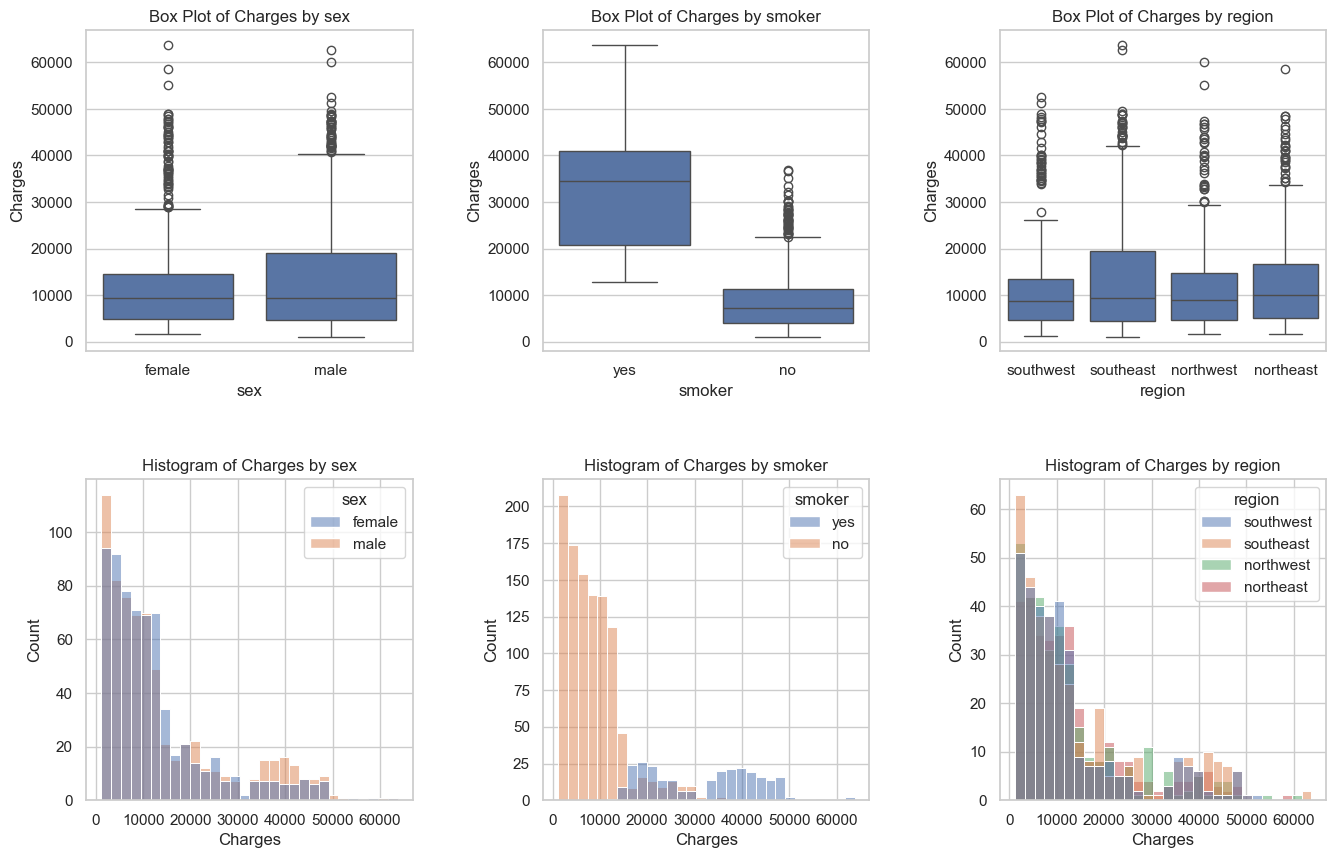

In [5]:
sns.set(style='whitegrid')

# Create subplots for box plots and histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplots

# Categorical variables to analyze
categorical_vars = ['sex', 'smoker', 'region']

# Create box plots and histograms for each variable
for i, var in enumerate(categorical_vars):
    # Box plot
    sns.boxplot(x=var, y='charges', data=insurance, ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of Charges by {var}')
    axes[0, i].set_ylabel('Charges')
    
    # Histogram
    sns.histplot(data=insurance, x='charges', hue=var, ax=axes[1, i,])
    axes[1, i].set_title(f'Histogram of Charges by {var}')
    axes[1, i].set_xlabel('Charges')
    axes[1, i].set_ylabel('Count')

plt.show()


#### Notes:
1. Distribution of charges for male and female patient claims are similar, though is more right-skewed for males.
2. Distribution of charges across regions are also similarl, though is more right-skewed for the southeast.
3. There is a clear difference in charges for non-smokers vs. smokers. The average charge for a smoker is almost $30,000 higher than for a non-smoker. In fact, the minimum charge for  smokers is higher than the 75th percentile of charges for non-smokers. 



### Choosing predictors:

I will include age, bmi, and smoker status in the predictor model. Age and bmi have relatively high correlations with charges, and the distribution of charges is very different between smokers and non-smokers. May consider adding sex and region dummies to the model as well, as there are slight differences in charges across each category of these variables. 

## Split the data into training and test sets.
Using 20% of the data as test data. 

In [6]:
#insurance_copy = insurance.copy()
insurance_copy = pd.get_dummies(data = insurance.copy())
X = insurance_copy.drop(['charges'], axis=1)
y = insurance_copy['charges']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=777)

print('X_train shape: \n',  X_train.shape, 
      '\n\nX_test shape: \n', X_test.shape, 
      '\n\ny_train shape: \n', y_train.shape,
     '\n\ny_test shape: \n', y_test.shape)

X_train shape: 
 (1070, 11) 

X_test shape: 
 (268, 11) 

y_train shape: 
 (1070,) 

y_test shape: 
 (268,)


## Develop model

In [8]:
X_train_predictors = X_train[['age', 'bmi', 'smoker_yes']]
model = LinearRegression()
model.fit(X_train_predictors, y_train)

print('Coefficients: ', model.coef_)
print('Intercept:  ',  model.intercept_)

train_predictions = model.predict(X_train_predictors)
training_rmse = mean_squared_error(y_train, train_predictions, squared=False)
training_r2 = r2_score(y_train, train_predictions)

print('RMSE: ', training_rmse)
print('R-squared: ', training_r2)



Coefficients:  [  261.23436202   315.60658528 23864.18019644]
Intercept:   -11484.289906716429
RMSE:  6081.984629238531
R-squared:  0.7425355389208226


#### Notes on results:
1. Holding BMI and smoker status constant, a year increase in age is associated with a \$261 increase in charges. 
2. Holding age and smoker status constant, a one unit increase in BMI is associated with a \$315 increase in charges. 
3. Holding age and BMI constant, being a smoker increase charges by almost \$24,000. 
4. Given that the mean charge is about \$13,000, the RMSE seems quite high at \$6,081.
5. The R-squared for this model is quite high at 0.74


### A closer look at the residuals

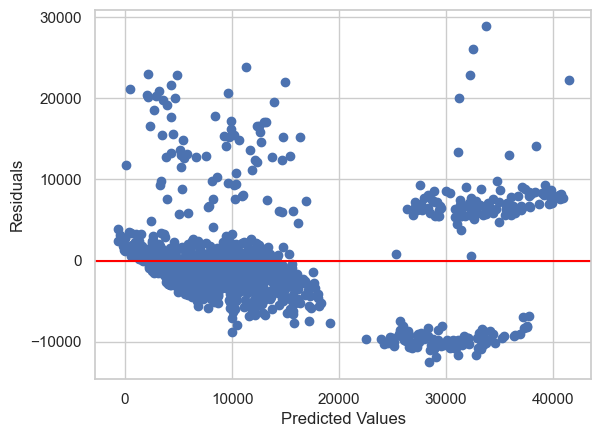

In [18]:
residuals = y_train - train_predictions
plt.plot(train_predictions, residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Notes:
There seems to be some heterskedasticity in the residuals  - they trend downward between 0 and 20,000, with many higher outliers, and then split between more positive and more negative groups after 20,000. 

The three cells below plot residuals against age, bmi, and charges. 

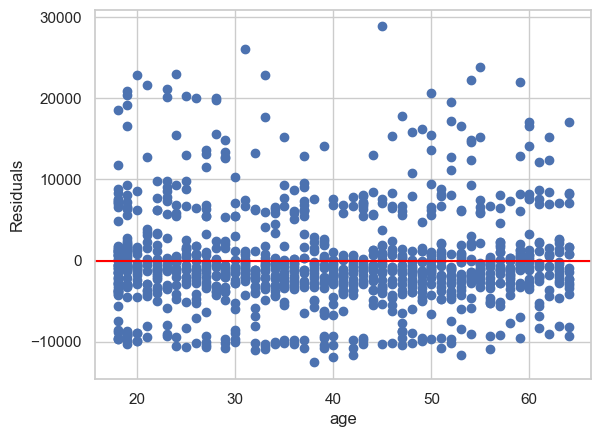

In [19]:
plt.plot(X_train_predictors['age'], residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('age')
plt.ylabel('Residuals')
plt.show()

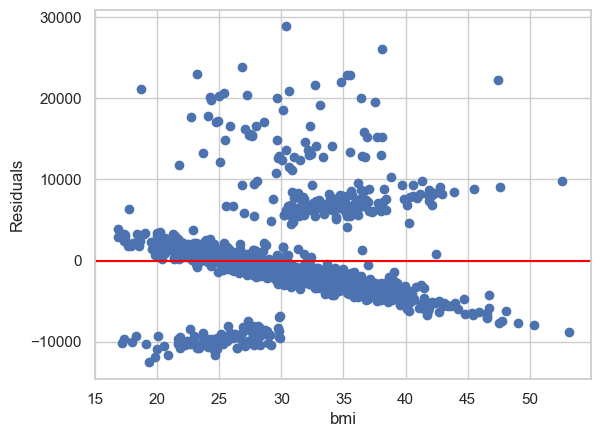

In [20]:
plt.plot(X_train_predictors['bmi'], residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('bmi')
plt.ylabel('Residuals')
plt.show()

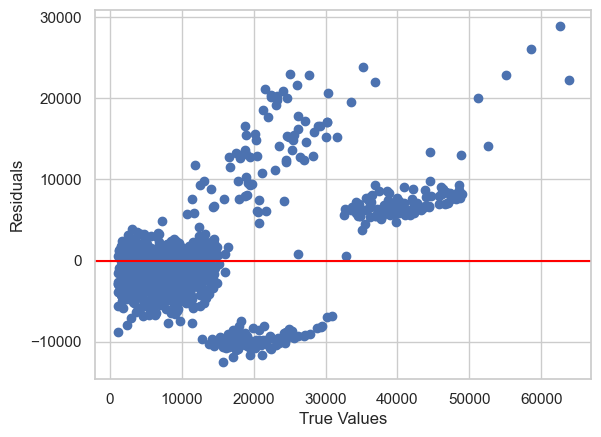

In [21]:
plt.plot(y_train, residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

####  Notes:
It's clear that bmi is driving some of the heteroskedasticity observed. Plotting the true values of charges against the residuals also shows non-constant variance in the residuals. 

## Log transformation of charges

In [24]:
y_train_log = np.log(y_train)

model = LinearRegression()
model.fit(X_train_predictors, y_train_log)

print('Coefficients: ', model.coef_)
print('Intercept:  ',  model.intercept_)

train_predictions = model.predict(X_train_predictors)
training_rmse = np.exp(mean_squared_error(y_train_log, train_predictions, squared=False))
training_r2 = r2_score(y_train_log, train_predictions)

print('RMSE: ', training_rmse)
print('R-squared: ', training_r2)

Coefficients:  [0.03512602 0.0099539  1.561869  ]
Intercept:   7.106296461000538
RMSE:  1.5955514301842617
R-squared:  0.7376035498702924


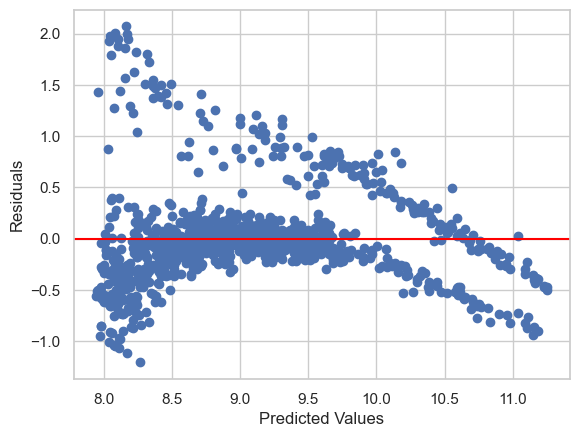

In [25]:
residuals = y_train_log - train_predictions
plt.plot(train_predictions, residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

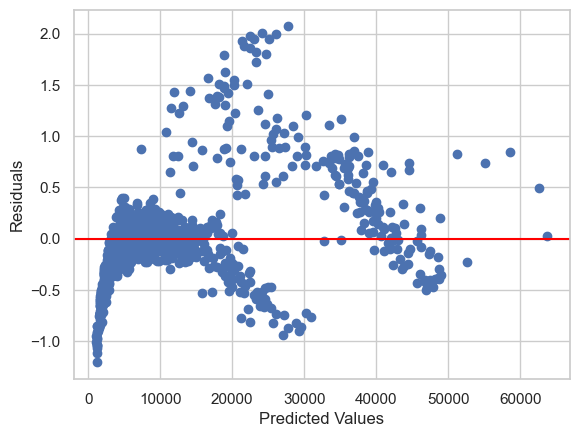

In [27]:
plt.plot(y_train, residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Log transformation of BMI

In [31]:
X_train_predictors = X_train[['age', 'smoker_yes']]
X_train_predictors['log_bmi'] = np.log(X_train['bmi'])

model = LinearRegression()
model.fit(X_train_predictors, y_train_log)

print('Coefficients: ', model.coef_)
print('Intercept:  ',  model.intercept_)

train_predictions = model.predict(X_train_predictors)
training_rmse = np.exp(mean_squared_error(y_train_log, train_predictions, squared=False))
training_r2 = r2_score(y_train_log, train_predictions)

print('RMSE: ', training_rmse)
print('R-squared: ', training_r2)

Coefficients:  [0.03506896 1.56238546 0.3209118 ]
Intercept:   6.32161296798785
RMSE:  1.5946809666375104
R-squared:  0.7382161423456854


/var/folders/1m/w9khs5v570x0s7rr70jfpxxh0000gq/T/ipykernel_27288/98956452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_predictors['log_bmi'] = np.log(X_train['bmi'])


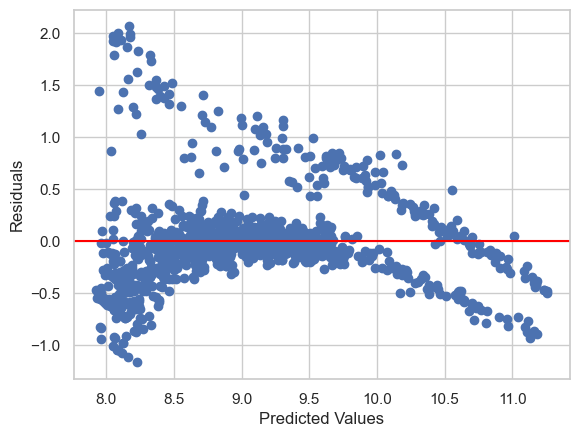

In [32]:
residuals = y_train_log - train_predictions
plt.plot(train_predictions, residuals, 'bo')
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Notes:
Log transformations don't seem to help heteroskedasticity in the residuals...go back to original linear model.

In [33]:
X_train_predictors = X_train[['age', 'bmi', 'smoker_yes']]
model = LinearRegression()
model.fit(X_train_predictors, y_train)

print('Coefficients: ', model.coef_)
print('Intercept:  ',  model.intercept_)

train_predictions = model.predict(X_train_predictors)
training_rmse = mean_squared_error(y_train, train_predictions, squared=False)
training_r2 = r2_score(y_train, train_predictions)

print('RMSE: ', training_rmse)
print('R-squared: ', training_r2)


Coefficients:  [  261.23436202   315.60658528 23864.18019644]
Intercept:   -11484.289906716429
RMSE:  6081.984629238531
R-squared:  0.7425355389208226


In [35]:
test_predictions = model.predict(X_test[['age', 'bmi', 'smoker_yes']])
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

print('Test RMSE: ', test_rmse)
print('Test R-squared: ', test_r2)


Test RMSE:  6090.178511594489
Test R-squared:  0.7648113732001275


#### Notes:
Test R-squared and RMSE are similar to those of the training dataset.